In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv(r"F:\ML\100 days ml\data\wine_data.csv",header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [7]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

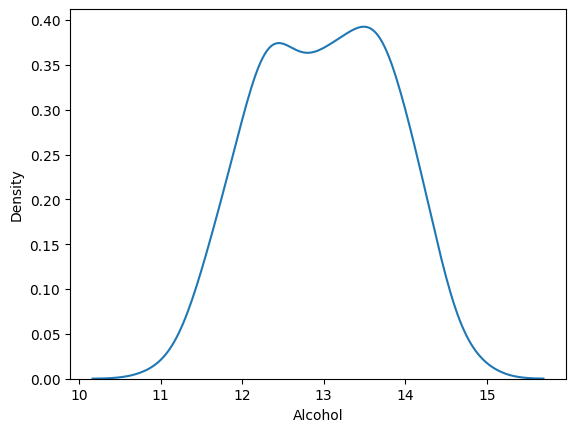

In [8]:
#NORMALIsATION
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

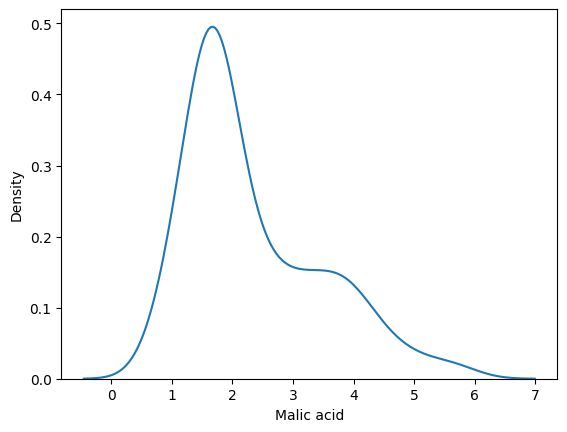

In [9]:
sns.kdeplot(df["Malic acid"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

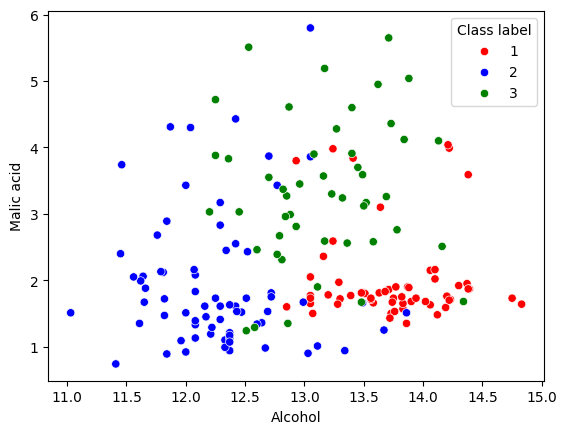

In [13]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [14]:
df["Class label"].unique()

array([1, 2, 3], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop("Class label",axis=1),df["Class label"],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled=scaler.transform(x_train)


In [32]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_train.columns)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [35]:
np.round(x_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [38]:
np.round(x_test_scaled.describe(), 1)

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


In [41]:
sns.scatterplot(x=x_test["Alcohol"],y=x_test["Malic acid"]palette={"Red","Blue"})

SyntaxError: invalid syntax. Perhaps you forgot a comma? (539979652.py, line 1)

Text(0.5, 1.0, 'after normalization')

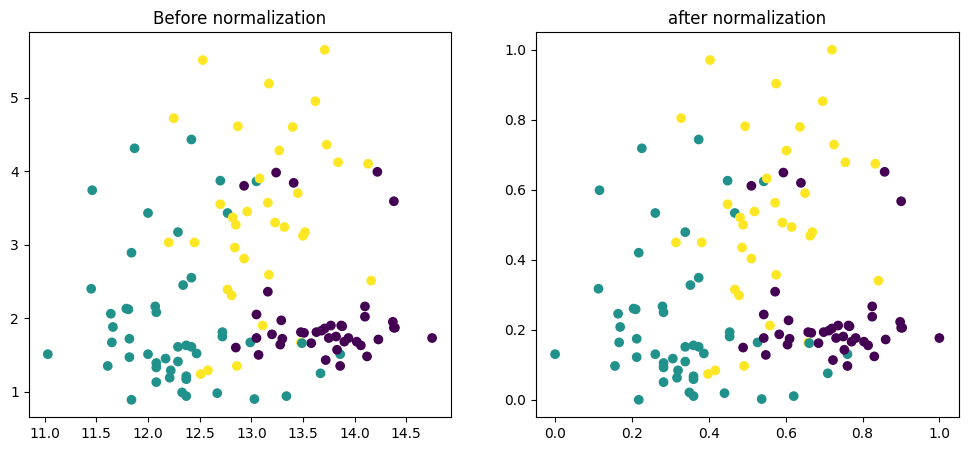

In [47]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train["Alcohol"],x_train["Malic acid"],c=y_train)
ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic acid"],c=y_train)
ax1.set_title("Before normalization")
ax2.set_title("after normalization")

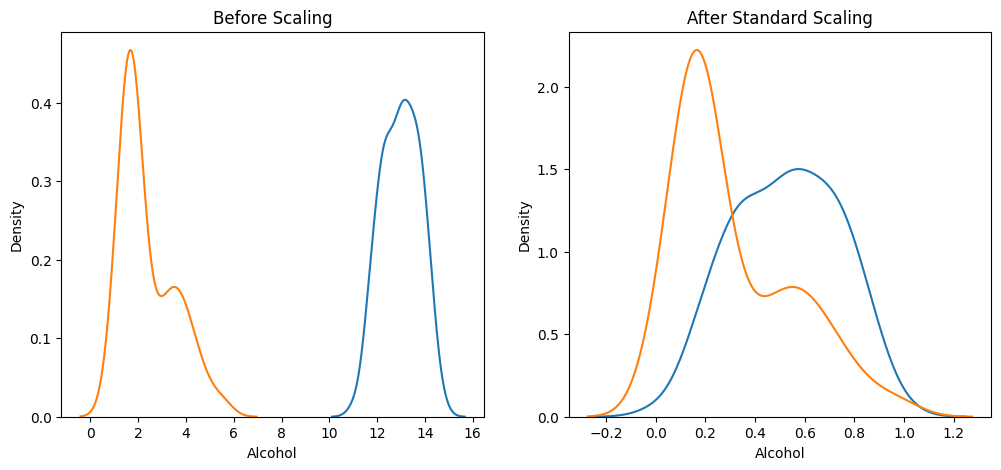

In [48]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()